# 股市泡沫檢測器 - FinLab
這是一個泡沫檢測器，只要輸入[yahoo finance](https://finance.yahoo.com/)上找到的股票代號，即可查看該股票是否有泡沫，或是反泡沫。此程式碼使用 [lppls package](https://github.com/Boulder-Investment-Technologies/lppls) 讓我們非常方便的來使用 LPPL 這個數學工具。

<Axes: xlabel='Date'>

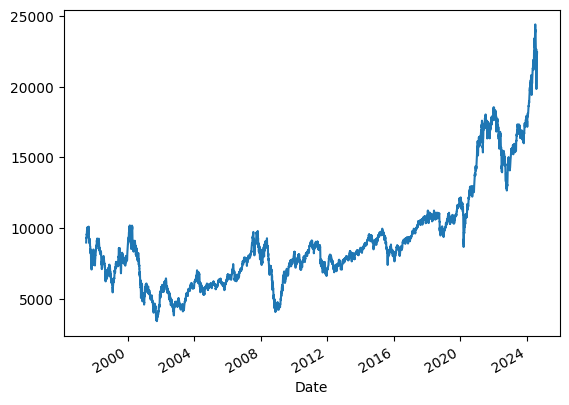

In [ ]:
#@title 下載歷史價格

try:
    import yfinance as yf
except:
    !pip install lppls > log.txt
    !pip install yfinance > log.txt

asset_symbol = "0050.TW" #@param {type:"string"}

import yfinance as yf
stock = yf.Ticker(asset_symbol)

# get historical market data
data = stock.history(period="max")
data.Close.plot()


In [ ]:
pip install -U lppls > log.txt

/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:213: RuntimeWarning: invalid value encountered in log
  O = (w / (2.0 * np.pi)) * np.log((tc - first) / (tc - last))


Crash Date (tc): 2009-02-27
( b < 0   )  0.004475272316151699
(|c| < 1  )  0.003513296533419336
(0 < m < 1)  0.9862271277083052


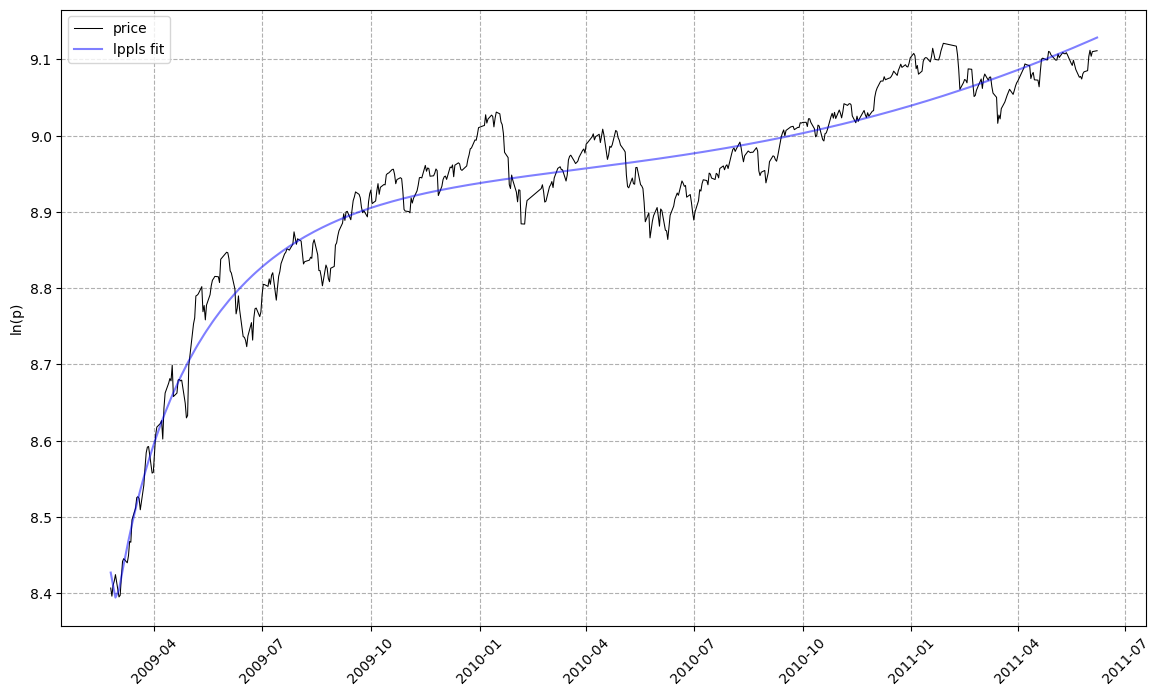

In [ ]:
#@title LPPL 分析
variable_name = "2011-06-07" #@param {type:"date"}
ndates = 570 # @param {"type":"slider","min":0,"max":1080,"step":1}

from lppls import lppls, data_loader
import numpy as np
import pandas as pd
from datetime import datetime as dt
%matplotlib inline

# read example dataset into df
#data = data_loader.nasdaq_dotcom()

# convert time to ordinal

processing_data = data.loc[:variable_name].iloc[-ndates:].reset_index()
processing_data.Date = pd.to_datetime(processing_data['Date']).dt.date.astype(str)

time = [pd.Timestamp.toordinal(dt.strptime(t1, '%Y-%m-%d')) for t1 in processing_data['Date']]

# create list of observation data
price = np.log(processing_data['Close'].values)

# create observations array (expected format for LPPLS observations)
observations = np.array([time, price])

# set the max number for searches to perform before giving-up
# the literature suggests 25
MAX_SEARCHES = 25

# instantiate a new LPPLS model with the Nasdaq Dot-com bubble dataset
lppls_model = lppls.LPPLS(observations=observations)

# fit the model to the data and get back the params
tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(MAX_SEARCHES)

# visualize the fit
lppls_model.plot_fit()
# Calculate and print the crash date
crash_date = dt.fromordinal(int(tc)).strftime('%Y-%m-%d')
print(f"Crash Date (tc): {crash_date}")


import datetime
print('( b < 0   ) ', b)
print('(|c| < 1  ) ', c)
print('(0 < m < 1) ', m)

# 小週期來觀看這次的行情


  0%|          | 0/551 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  

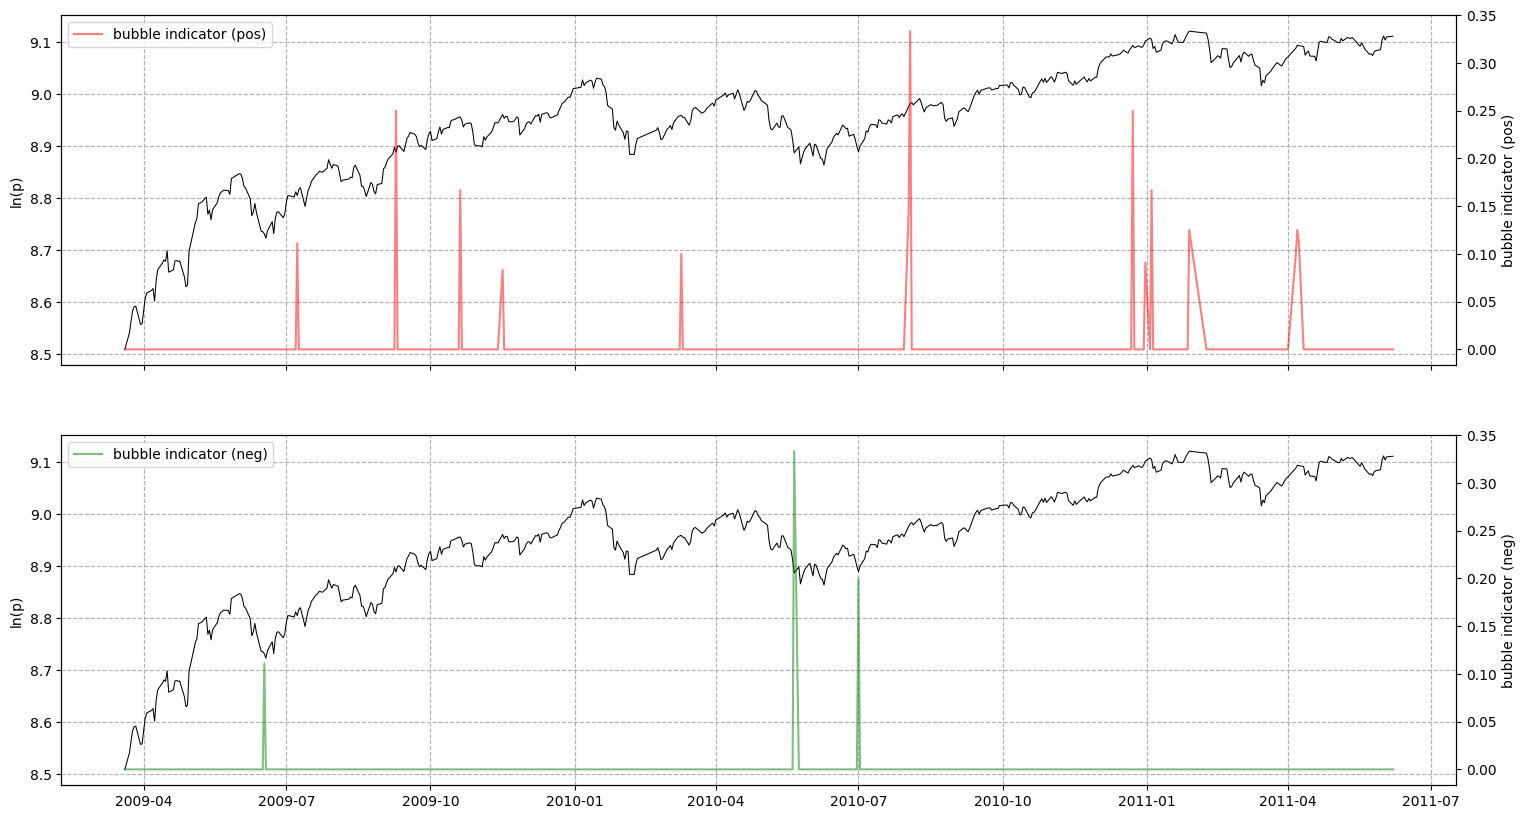

In [ ]:
# compute the confidence indicator
res = lppls_model.mp_compute_nested_fits(
    workers=8,
    window_size=20,
    smallest_window_size=5,
    outer_increment=1,
    inner_increment=1,
    max_searches=500,
    # filter_conditions_config={} # not implemented in 0.6.x
)

lppls_model.plot_confidence_indicators(res)
# should give a plot like the following...

  0%|          | 0/556 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
  0%|          | 1/556 [00:19<2:56:30, 19.08s/it]/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: Ru

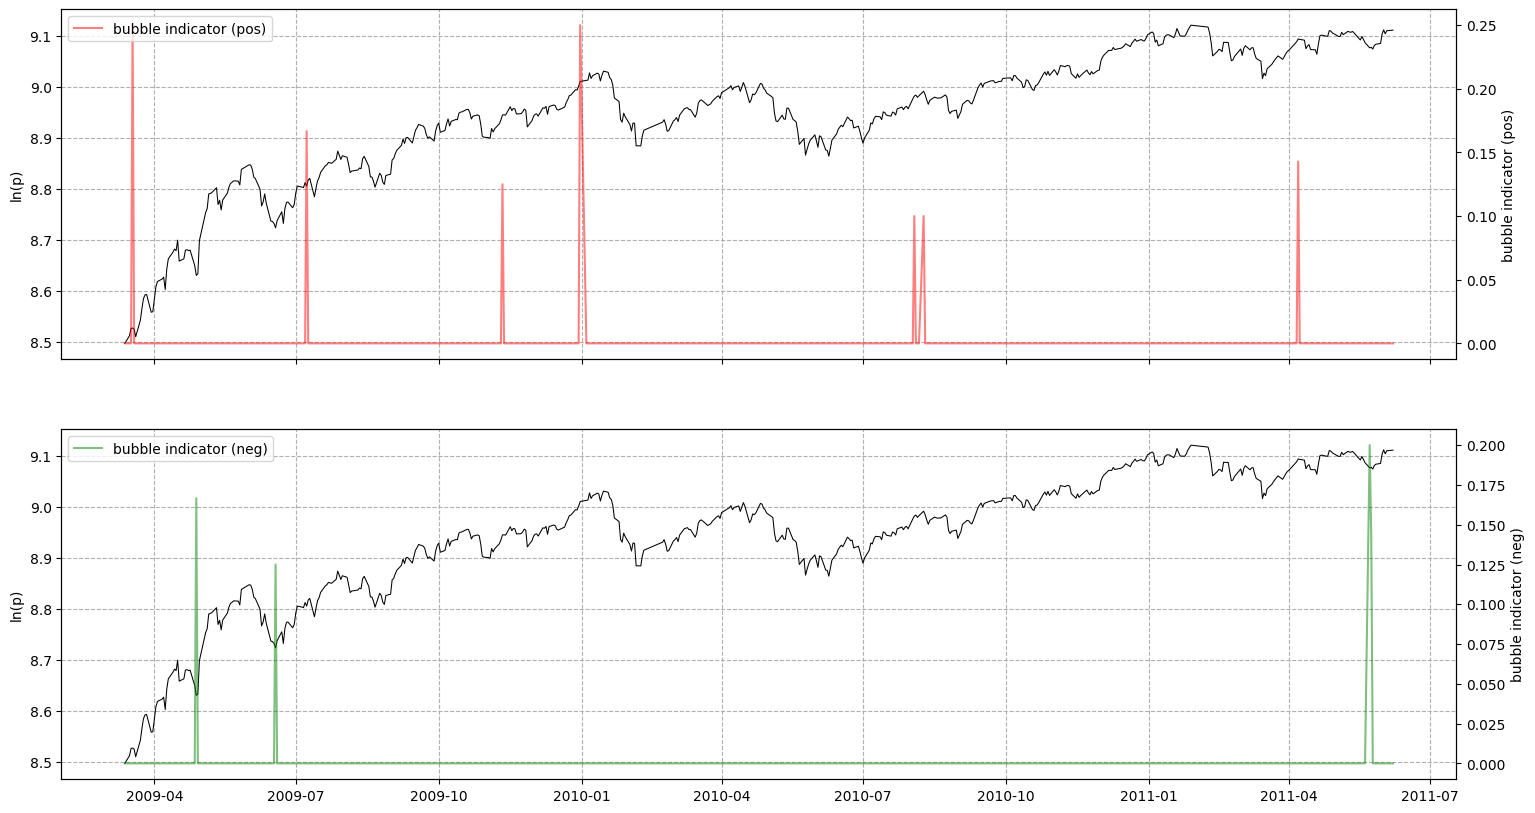

In [ ]:
# compute the confidence indicator
res = lppls_model.mp_compute_nested_fits(
    workers=8,
    window_size=15,
    smallest_window_size=5,
    outer_increment=1,
    inner_increment=1,
    max_searches=500,
    # filter_conditions_config={} # not implemented in 0.6.x
)

lppls_model.plot_confidence_indicators(res)
# should give a plot like the following...

  0%|          | 0/556 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  

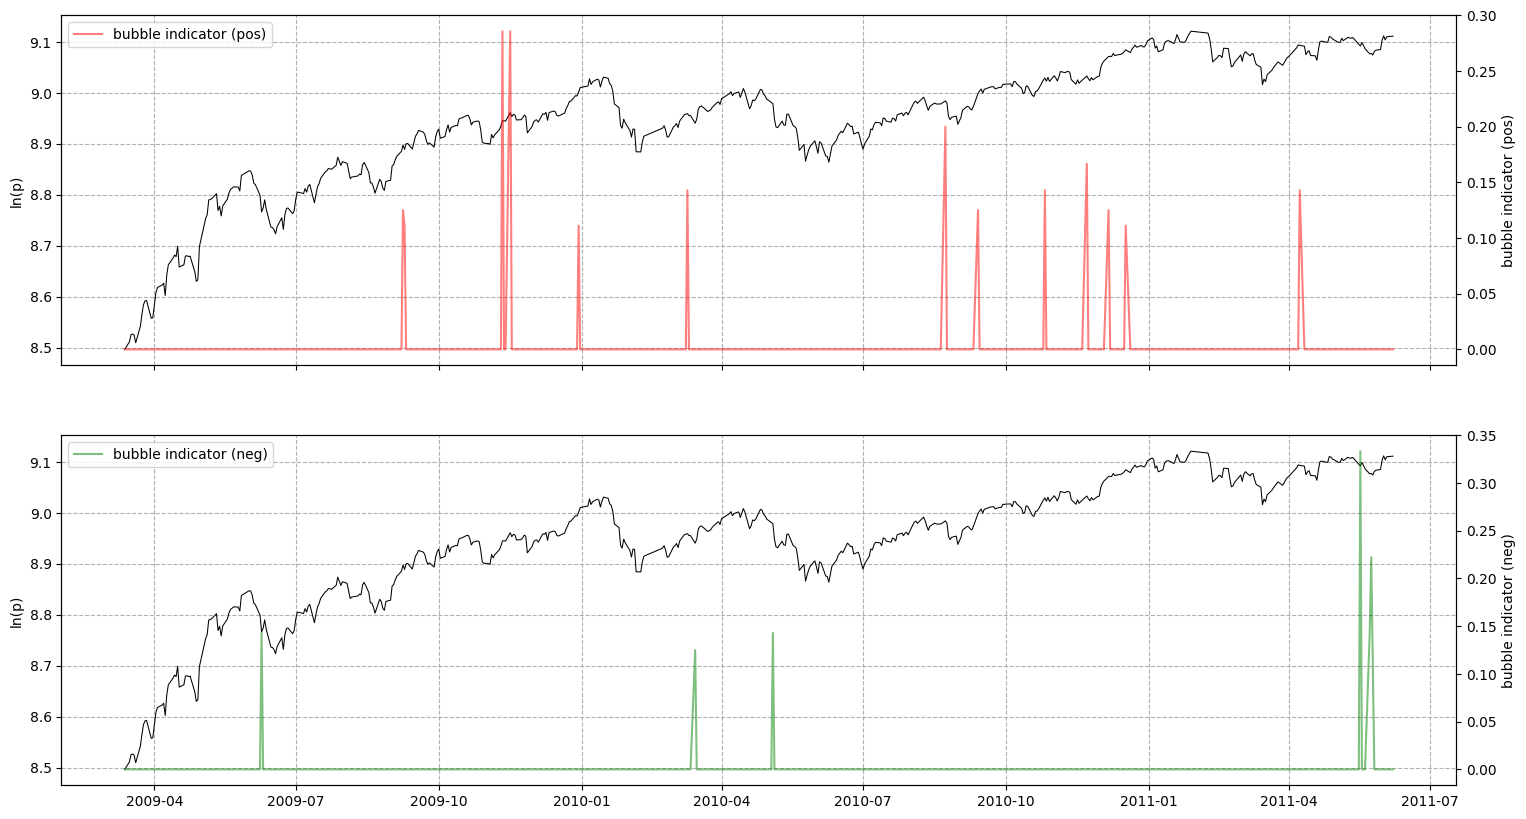

In [ ]:
# compute the confidence indicator
res = lppls_model.mp_compute_nested_fits(
    workers=8,
    window_size=15,
    smallest_window_size=3,
    outer_increment=1,
    inner_increment=1,
    max_searches=500,
    # filter_conditions_config={} # not implemented in 0.6.x
)

lppls_model.plot_confidence_indicators(res)
# should give a plot like the following...

  0%|          | 0/556 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
  0%|          | 1/556 [00:18<2:51:50, 18.58s/it]/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
  0%|          | 2/556 [00:24<1:42:20, 11.08s/it]/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
  1%|          | 4/556 [00:26<44:39,  4.85s/it]  /usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.p

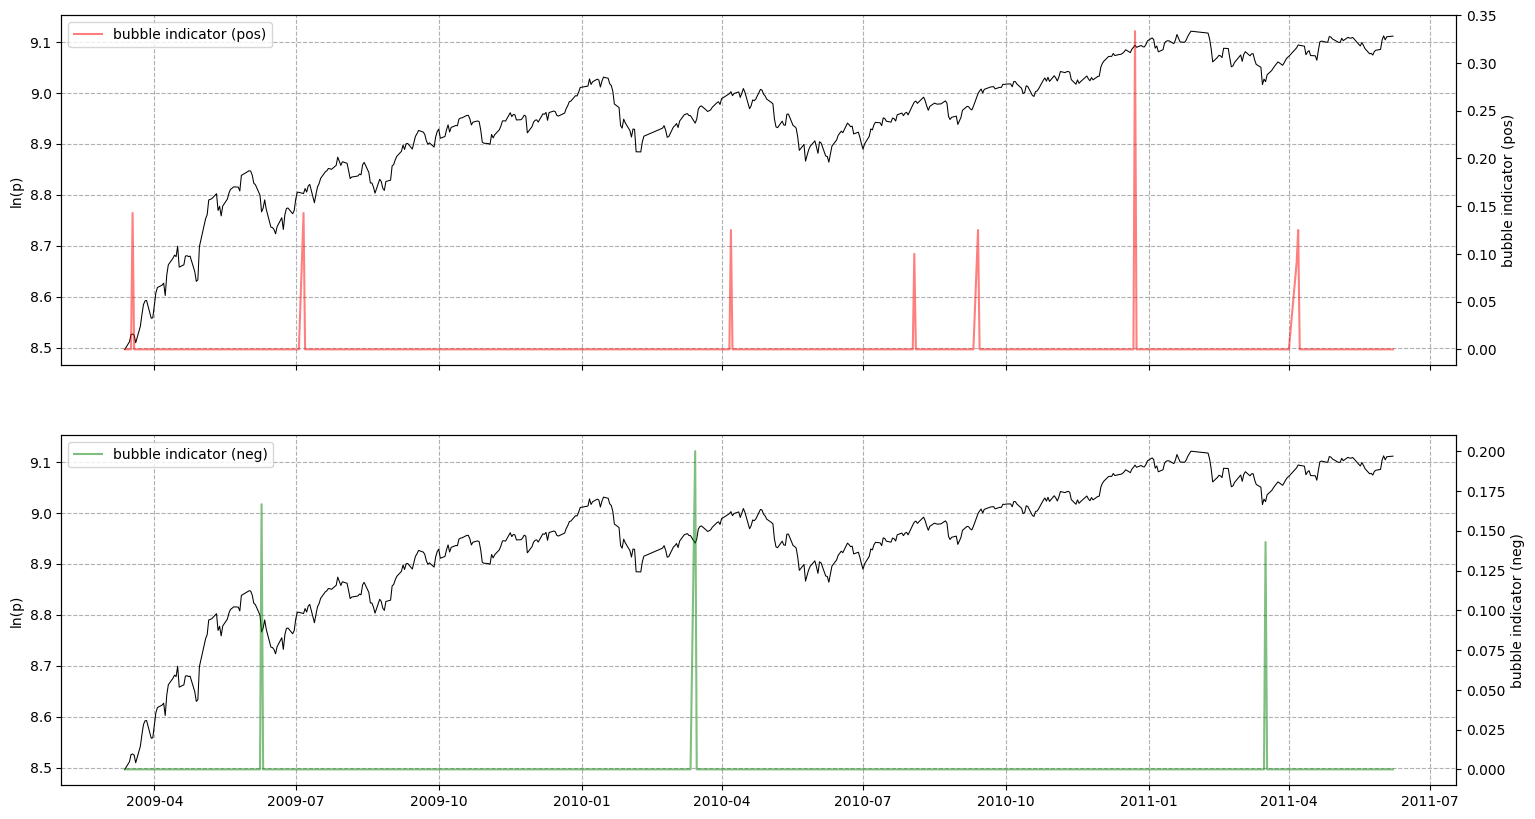

In [ ]:
# compute the confidence indicator
res = lppls_model.mp_compute_nested_fits(
    workers=8,
    window_size=15,
    smallest_window_size=3,
    outer_increment=1,
    inner_increment=1,
    max_searches=500,
    # filter_conditions_config={} # not implemented in 0.6.x
)

lppls_model.plot_confidence_indicators(res)
# should give a plot like the following...

  0%|          | 0/561 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
  1%|          | 3/561 [00:22<55:10,  5.93s/it]  /usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
  1%|          | 5/561 [00:23<29:04,  3.14s/it]/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
  1%|          

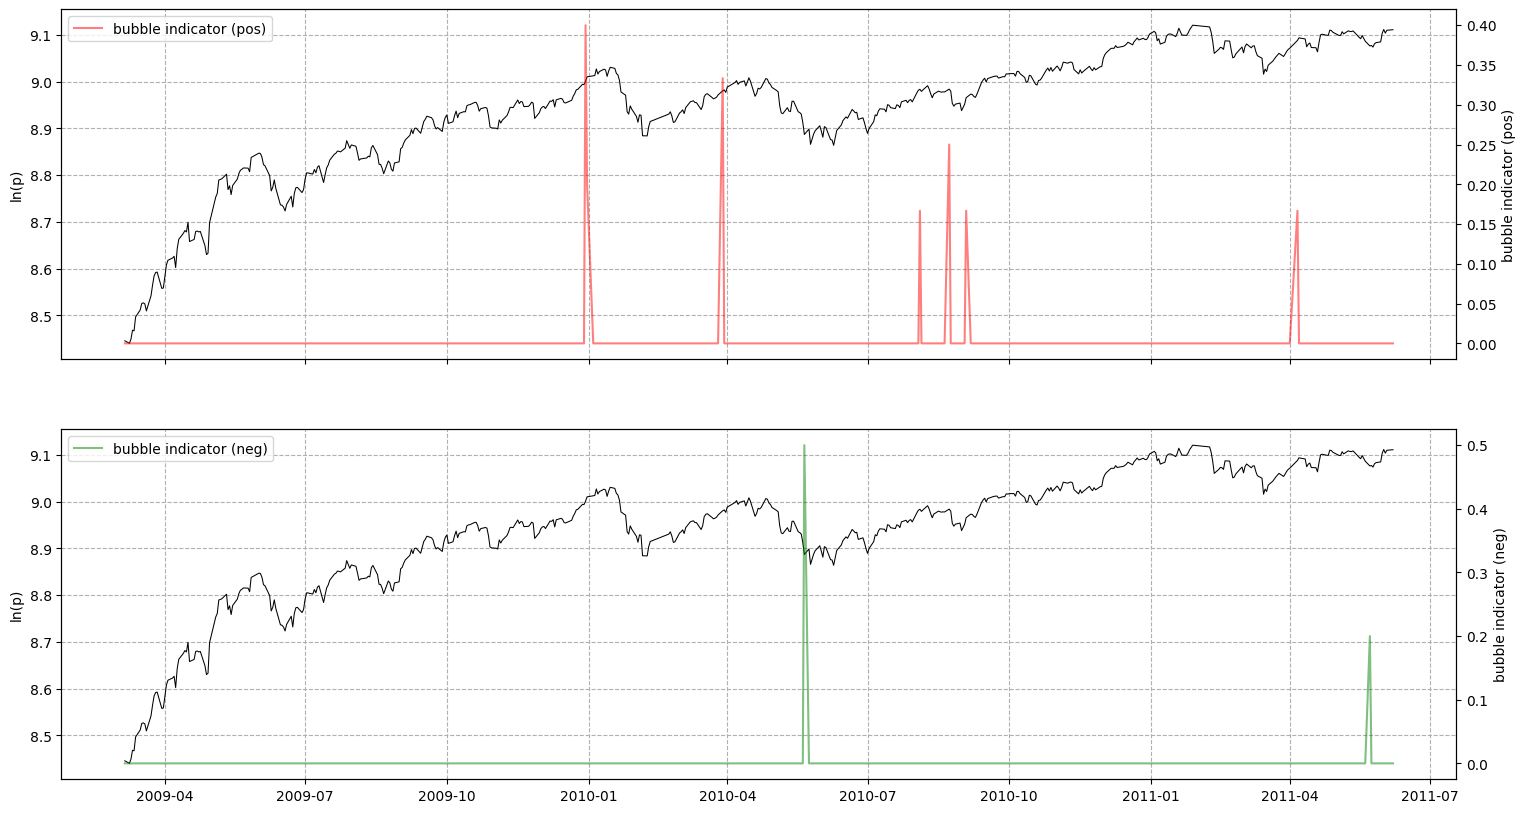

In [ ]:
# compute the confidence indicator
res = lppls_model.mp_compute_nested_fits(
    workers=8,
    window_size=10,
    smallest_window_size=3,
    outer_increment=1,
    inner_increment=1,
    max_searches=500,
    # filter_conditions_config={} # not implemented in 0.6.x
)

lppls_model.plot_confidence_indicators(res)
# should give a plot like the following...